# BiLSTM, LSTM & GRU

## Import Libraries

In [1]:
import numpy
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pickle

## Import Data

In [2]:
dataset = pd.read_csv("extracted_feature_with_Response.csv")
X = dataset.iloc[:,[1,258]].values
y = dataset.iloc[:,[-1]].values


In [3]:
dataset.describe()

,CTD.C_A,CTD.C_T,CTD.C_C,CTD.C_G,CTD.T_A_T,CTD.T_A_C,CTD.T_A_G,CTD.T_T_C,CTD.T_T_G,CTD.T_C_G,...,CKSAAP.G0G.2,CKSAAP.G1A.1,CKSAAP.G1T.1,CKSAAP.G1C.1,CKSAAP.G1G.1,CKSAAP.G2A,CKSAAP.G2T,CKSAAP.G2C,CKSAAP.G2G,Response
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.173911,0.169655,0.326005,0.330429,0.052728,0.112409,0.115872,0.121176,0.106072,0.253488,...,29.198795,17.361446,19.746988,35.885542,30.945783,16.951807,14.813253,34.132530,37.728916,0.825301
std,0.049914,0.043270,0.050741,0.044041,0.031173,0.029391,0.028282,0.026755,0.025699,0.070033,...,13.295805,9.056828,9.055845,17.225215,13.823676,9.254520,7.820413,15.169564,16.390833,0.380858
min,0.093496,0.094527,0.117409,0.187215,0.008721,0.045249,0.051163,0.052632,0.035000,0.046154,...,7.000000,5.000000,4.000000,6.000000,3.000000,4.000000,1.000000,3.000000,7.000000,0.000000
25%,0.140474,0.142272,0.308384,0.308831,0.033259,0.090641,0.096441,0.104692,0.087868,0.222408,...,21.000000,11.000000,14.000000,25.250000,22.000000,11.000000,10.000000,25.000000,28.000000,1.000000
50%,0.168239,0.159995,0.333333,0.330677,0.046693,0.111993,0.113861,0.117979,0.103933,0.260878,...,27.000000,15.000000,18.000000,34.000000,30.000000,15.000000,13.000000,32.000000,35.000000,1.000000
75%,0.193515,0.186854,0.353590,0.364342,0.059693,0.129469,0.132042,0.134817,0.119801,0.293355,...,34.000000,22.000000,23.000000,43.000000,37.750000,20.000000,17.750000,41.000000,45.000000,1.000000
max,0.380567,0.318008,0.457143,0.427451,0.209459,0.218593,0.236842,0.221918,0.184100,0.396476,...,115.000000,64.000000,77.000000,177.000000,114.000000,77.000000,53.000000,138.000000,150.000000,1.000000


## Split the data set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Scaling the dataset

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## Create a 3D input

In [6]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
X_test, y_test = create_dataset(X_test_norm, y_test,   
                                TIME_STEPS)
X_train, y_train = create_dataset(X_train_norm, y_train, 
                                  TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (4, 30, 2)
y_train.shape:  (102, 1)
X_test.shape:  (4, 30, 2)
y_test.shape:  (102, 1)


## Designing the network architecture

### Create BiLSTM, LSTM and GRU model

In [7]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    # First layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Second layer of BiLSTM
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model


# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    #First layer of LSTM
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    #Second Layer of LSTM
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU
model_gru = create_model(64, GRU)

# LSTM
model_lstm = create_model(64, LSTM)


## LSTM model fitting

In [8]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
3/3 [==============================] - 2s 539ms/step - loss: 0.7776 - val_loss: 1.1114
Epoch 2/100
3/3 [==============================] - 0s 65ms/step - loss: 0.4798 - val_loss: 1.3476
Epoch 3/100
3/3 [==============================] - 0s 60ms/step - loss: 0.2265 - val_loss: 1.6495
Epoch 4/100
3/3 [==============================] - 0s 63ms/step - loss: 0.2367 - val_loss: 1.4210
Epoch 5/100
3/3 [==============================] - 0s 63ms/step - loss: 0.2009 - val_loss: 1.0477
Epoch 6/100
3/3 [==============================] - 0s 67ms/step - loss: 0.1572 - val_loss: 0.8005
Epoch 7/100
3/3 [==============================] - 0s 64ms/step - loss: 0.1615 - val_loss: 0.6509
Epoch 8/100
3/3 [==============================] - 0s 64ms/step - loss: 0.1552 - val_loss: 0.5508
Epoch 9/100
3/3 [==============================] - 0s 69ms/step - loss: 0.1426 - val_loss: 0.4777
Epoch 10/100
3/3 [==============================] - 0s 68ms/step - loss: 0.1414 - val_loss: 0.4245
Epoch 11/100
3/3 [

## Plot train loss and validation loss

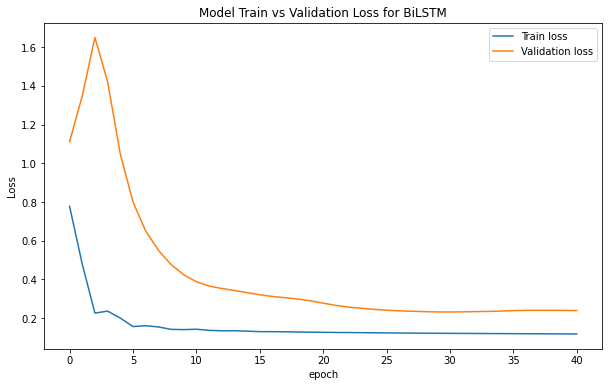

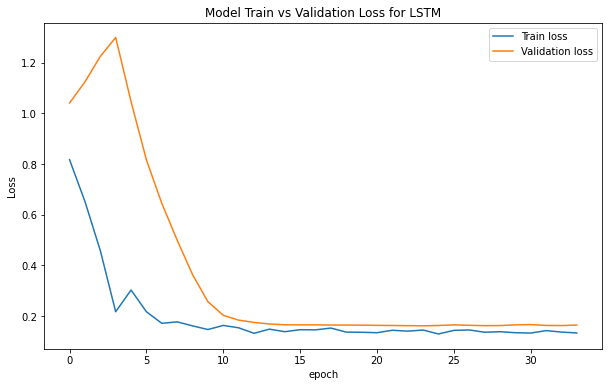

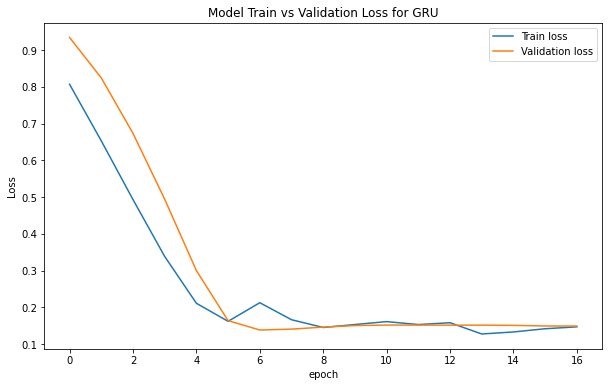

In [9]:
def plot_loss (history,model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

## Inverse transform the target variable

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

## Make prediction using LSTM and GRU

In [10]:
def prediction(model):
    prediction = model.predict(X_test)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

## Plot true future vs prediction

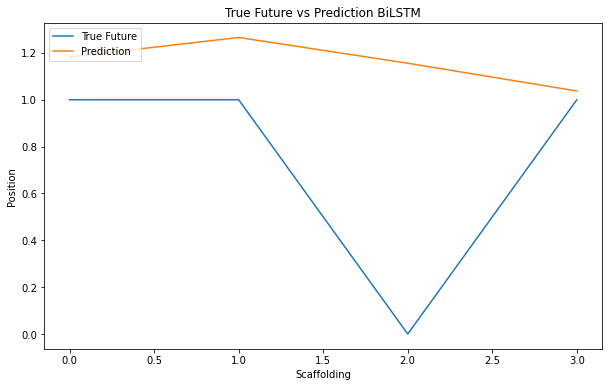

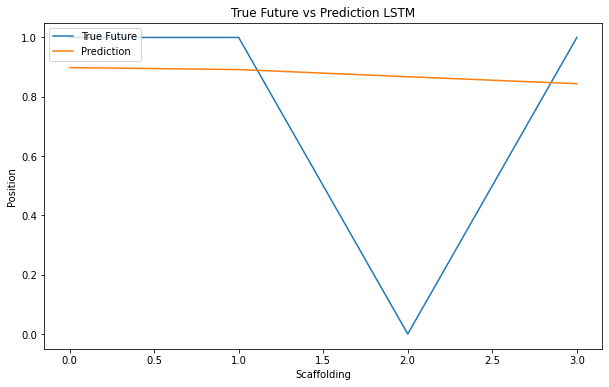

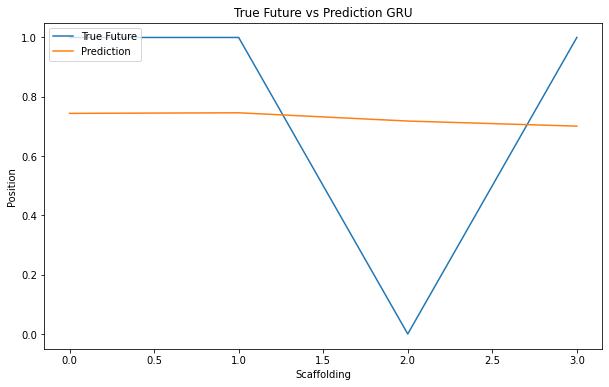

In [11]:
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.title('True Future vs Prediction ' + model_name)
    plt.xlabel('Scaffolding')
    plt.ylabel('Position')

plot_future(prediction_bilstm,'BiLSTM', y_test)
plot_future(prediction_lstm,'LSTM', y_test)
plot_future(prediction_gru, 'GRU' ,y_test)

## Calculate RMSE and MAE

In [12]:
def evaluate_prediction(predictions, actual, model_name):
    errors =  actual - predictions
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 0.4104
Root Mean Square Error: 0.6003

LSTM:
Mean Absolute Error: 0.3083
Root Mean Square Error: 0.4470

GRU:
Mean Absolute Error: 0.3818
Root Mean Square Error: 0.4287



## Input Curated data

In [13]:
# Import data projection
newinput = pd.read_csv('')

# Order of the variable are important
X_new = newinput.loc[:,[1,258]].values 
X_new

FileNotFoundError: [Errno 2] No such file or directory: ''

## Plot histoy and future data

In [14]:
def plot_history_future(y_train, prediction, model_name):
    
    plt.figure(figsize=(10, 6))
    
    range_history = len(y_train)
    range_future = list(range(range_history, range_history + len(prediction)))
    
    plt.plot(np.arange(range_history), np.array(y_train), label='History')
    plt.plot(range_future, np.array(prediction),label='Prediction')
    plt.legend(loc='upper right')
    plt.xlabel('Scaffolding')
    plt.ylabel('Position')
    plt.savefig('path/$.jpg', format = 'jpg', dpi = 1000)

## External Data Prediction

In [15]:
def classify(X_input, time_steps):
    # Scale the unseen input with the scaler fitted on the train set
    X = input_scaler.transform(X_input)
    # Reshape unseen data to a 3D input
    Xs = []
    for i in range(len(X) - time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
    X_transformed = np.array(Xs)
    
    # Make prediction for unseen data using LSTM model
    prediction = model_lstm.predict(X_transformed)
    prediction_actual = scaler_y.inverse_transform(prediction)
    return prediction_actual

prediction = classify(X_new, TIME_STEPS)
plot_history_future(y_train, prediction, 'BiLSTM')

NameError: name 'X_new' is not defined

## Create a Pickle file using serialization

In [16]:
pickle.dump(X_test, open('model_LSTM.pkl','wb'))

## Loading model to compare the results

In [17]:
model = pickle.load(open('model_LSTM.pkl','rb'))